# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

You can install this package by running in a terminal (you can also open it within Jupyter)

` pip install imageio `

In [2]:
import imageio

The following library is used to clean the output of a Jupyter cell

In [3]:
import IPython.display as jpt

Import Keras libraries from the Tensorflow namespace

In [4]:
import tensorflow.keras as K

# Define the image to learn

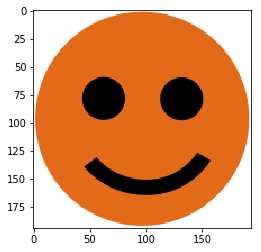

In [5]:
img = imageio.imread('smile.png')

plt.imshow(img)
plt.show()

In [6]:
np.shape(img)

(194, 194, 4)

In [7]:
img = imageio.imread('smile.png')
# Select only b/w channel of the image (imagesd with colors have other 3 channels (rgb))
img = img[:,:,0]

# img is now a [194,194] array of numbers between 0 and 255 (each one representing a pixel)
# We want to normalize this array from 0 to 1

img = img/255

img_size = np.shape(img)[0] # L_pixel = 194

def Function(x,y):
    # Map a real input between 0 and 1 to a pixel (between 0 and img_size-1)
    x_int = (x*(img_size-1)).astype(dtype='int')
    y_int = (y*(img_size-1)).astype(dtype='int')
    return img[x_int,y_int].reshape([-1,1])

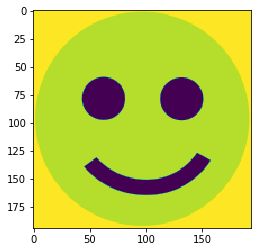

In [8]:
plt.imshow(img)
plt.show()

In [9]:
def get_batch(batchsize):
    y_in = np.random.uniform(low=0, high=1, size=[batchsize,2]) # [[x1,y1], [x2,y2], ...]
    f_out = Function(y_in[:,0],y_in[:,1])
    return (y_in, f_out)

# Define the neural network

In [10]:
eta=0.5

net = K.models.Sequential()
net.add(K.layers.Dense(150,input_shape=(2,), activation='relu'))
net.add(K.layers.Dense(150,activation='relu'))
net.add(K.layers.Dense(100,activation='relu'))
net.add(K.layers.Dense(1, activation='linear'))
net.compile(loss='mean_squared_error', optimizer=K.optimizers.SGD(lr=eta)) 
net.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               450       
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 38,301
Trainable params: 38,301
Non-trainable params: 0
_________________________________________________________________


# Train the network

In [11]:
costs=[]
N_batch = 40000
batchsize = 500

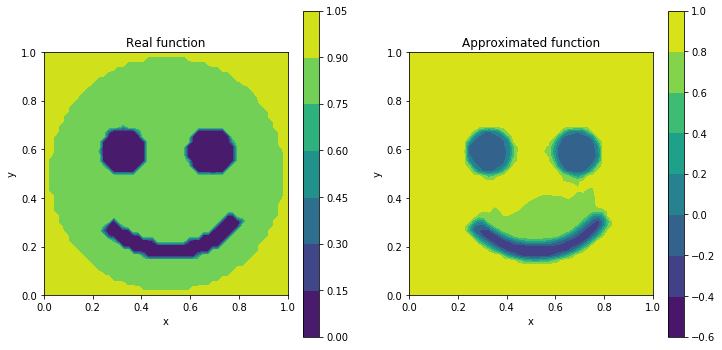

Training: 39000/40000,	Cost = 0.0133643
Network has been trained: final cost 5.0390032120e-03
Did we overfit?


In [15]:
for k in range(N_batch):
    y_in, f_out = get_batch(batchsize)
    costs.append(net.train_on_batch(y_in, f_out))
    
    if k%(int(N_batch/40)) == 0:
        jpt.clear_output(wait=True)
        plot_sampled_output()
        print("Training: %d/%d,\tCost = %2.7f" % (k,N_batch,costs[-1]))
        
print("Network has been trained: final cost %.10e" %costs[-1])
print("Did we overfit?")

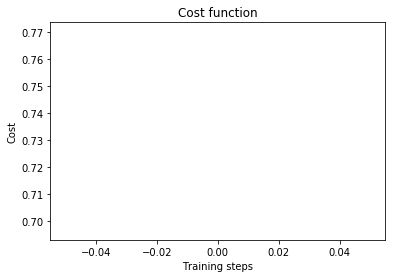

In [13]:
plt.figure()
plt.title("Cost function")
plt.plot(costs)
plt.xlabel("Training steps")
plt.ylabel("Cost")
plt.show()

# Evaluate the model and plot the results

In [14]:
def plot_sampled_output():
    x_start = 0
    x_end = 1
    
    y_start = 0
    y_end = 1
    
    Mx = 50
    x_in = np.linspace(x_start,x_end,Mx)
    
    My = 50
    y_in = np.linspace(y_start,y_end,My)
    
    x_test, y_test = np.meshgrid(x_in, y_in)
    
    net_in = np.array([x_test.flatten(),y_test.flatten()]).transpose()
    f_out = net.predict_on_batch(net_in)
    f_out = f_out.reshape([My,Mx])
    
    f_true = Function(x_test,y_test)
    
    fig = plt.figure(figsize=[12,6])
    plt.subplot(1,2,1)
    plt.contourf(x_test,y_test,np.flipud(f_true.reshape([My,Mx]).transpose()))
    plt.title("Real function")
    plt.gca().set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar()
    
    plt.subplot(1,2,2)
    plt.contourf(x_test,y_test,np.flipud(f_out.transpose()))
    plt.title("Approximated function")
    plt.gca().set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar()
    
    
    plt.show()